In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
agent = 'Ant'
valid_agents = ['Hopper', 'Ant']

if agent == 'Hopper':
    n_test = 126
    iter_ = 200
    iter_posteriors = [150,175,190,195,200,205,210,225,250,275,300,400]
    eval_epsds = 1

    env_names = ['Hopper-v2']
    folder_name = 'HopperTest'
    
    t = np.linspace(0,999,1000)
    
elif agent == 'Ant':
    n_test = 101
    iter_ = 600
    iter_posteriors = list(np.linspace(25,600,24, dtype='int'))
    eval_epsds = 4
    
    env_names = [ 'AntLeft-v3', 'AntRight-v3' ]
    folder_name = 'AntLeftRight_v2'
    
else:
    pass

common_path = folder_name + '/' + str(n_test)
specific_path = common_path + '/' + str(iter_)

In [18]:
metrics = np.loadtxt(specific_path + '_eval_metrics.txt')
rewards = np.loadtxt(specific_path + '_eval_rewards.txt')
events = np.loadtxt(specific_path + '_eval_events.txt')
epsd_lenghts = np.loadtxt(specific_path + '_eval_lenghts.txt')
S = []
S_upper_posterior = []
for i in iter_posteriors:
    S_upper_posterior.append(np.loadtxt(specific_path + '_eval_posteriors_' + str(i) + '.txt'))
    S.append(np.loadtxt(specific_path + '_eval_mstates_' + str(i) + '.txt'))
S = np.array(S)
S_upper_posterior = np.array(S_upper_posterior)
print(S_upper_posterior.shape)
n_evals, batch_size, n_concepts = S_upper_posterior.shape

(24, 2987, 8)


In [19]:
S_per_upper_step = S[:,:3*(batch_size//3)].reshape(n_evals,batch_size//3,3)
step_consistency = np.all(S_per_upper_step == S_per_upper_step[:,:,0].reshape(n_evals,-1,1), axis=2)
epsd_consistency = np.all(step_consistency, axis=1)
consistency_ratio = np.sum(step_consistency, axis=1)/(S_per_upper_step.shape[1])
S_argmax = S_upper_posterior.argmax(2)

In [20]:
print(epsd_consistency)
print(consistency_ratio)

[False False False False False False False False False False False False
 False False False False False False False False False False False False]
[0.83015075 0.51658291 0.91758794 0.74170854 0.84020101 0.76180905
 0.69346734 0.52864322 0.6160804  0.62713568 0.65326633 0.62211055
 0.58592965 0.63417085 0.64120603 0.51457286 0.50753769 0.59698492
 0.49748744 0.50351759 0.62110553 0.53467337 0.61909548 0.66532663]


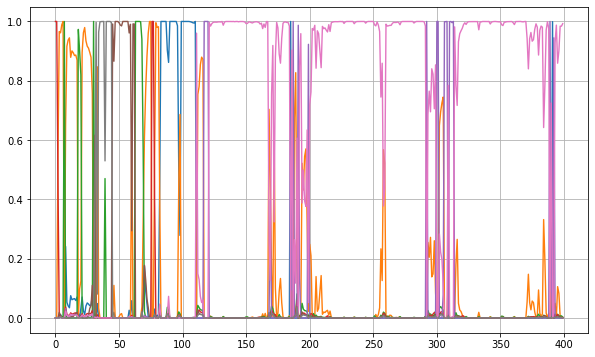

In [21]:
t = np.linspace(0,batch_size-1,batch_size)
x_lim = 400
plt.figure(figsize=(10,6))
for i in range(0, n_concepts):
    plt.plot(t[:x_lim], S_upper_posterior[4,:x_lim,i], linewidth=1.4)
plt.grid()
plt.savefig(specific_path + '_mstate_evolution.png', dpi=300)
plt.show()
plt.close()

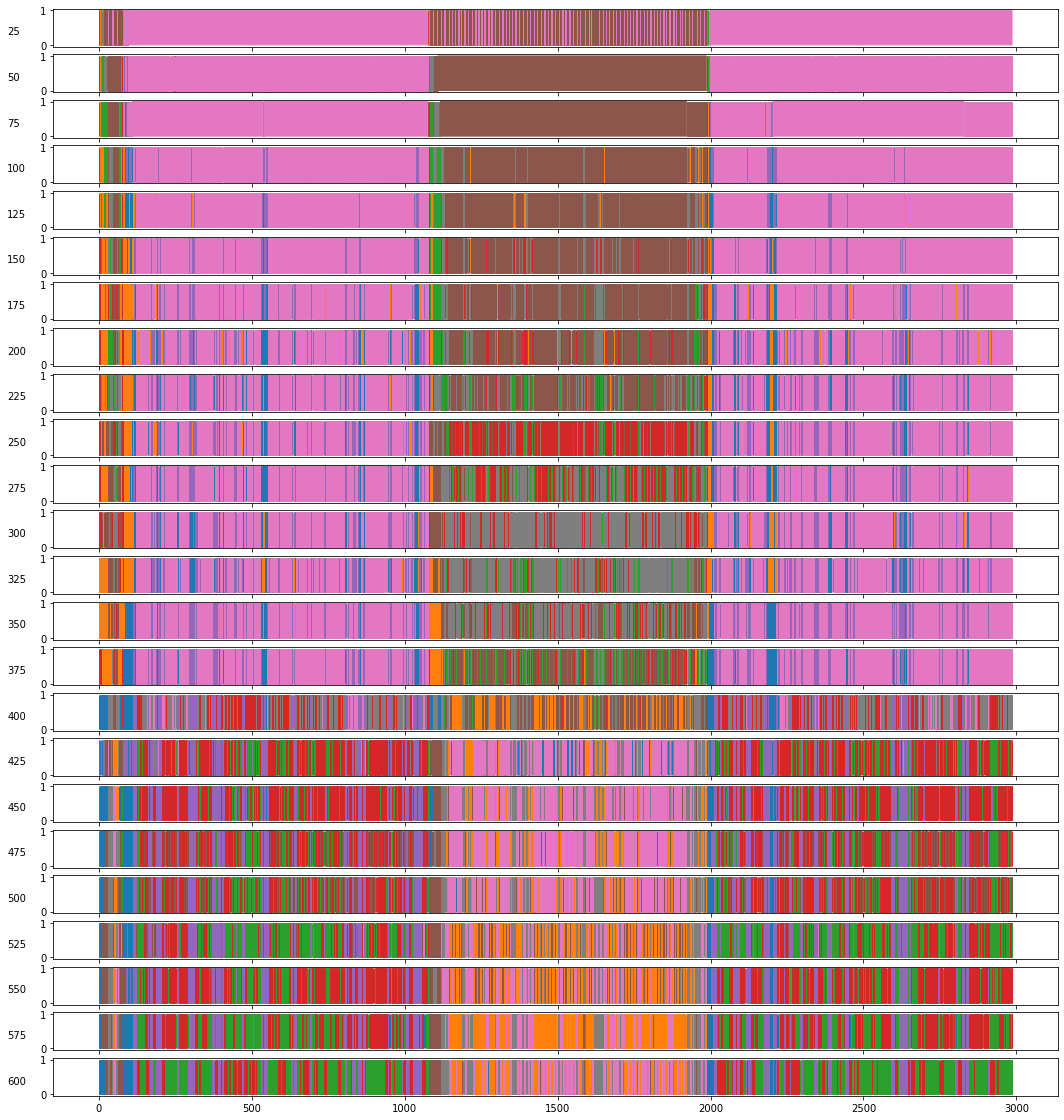

In [46]:
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(n_evals,1, sharex=True, figsize=(18,20), squeeze=False)
for j in range(0, n_evals):
    for i, color in enumerate(cmap([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])):
        ax[j,0].fill_between(t, np.zeros_like(t), np.ones_like(t), where=S_argmax[j,:]==i, 
                        facecolor=color, edgecolor=color, step='post')
    ax[j,0].text(-300,0.3,str(25*(j+1)))
# plt.stackplot(t, S_upper_posterior[0,:,:].T, step='mid')
plt.savefig(specific_path + '_mstate_evolution_stackplot.png', dpi=300)
plt.show()
plt.close()

In [37]:
import os

def exists_folder(f_name):
    return os.path.isdir(f_name)

if not exists_folder(specific_path + '_frames'):
    pass
else:
    for i in range(0,n_concepts):
        if not exists_folder(specific_path + '_frames/' + str(i)):
            os.mkdir(specific_path + '_frames/' + str(i))
            
    for image in range(0, batch_size):
        current_path = specific_path + '_frames/' + str(image) + '.jpg'
        new_path = specific_path + '_frames/' + str(S_argmax[0,image]) + '/' + str(image) + '.jpg'
        os.replace(current_path, new_path)

In [85]:
S_argmax.reshape(-1,20)

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
       [1, 1, 1, 1, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7],
       [7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7,